# Building a neural network in python 


In [77]:
import os
import sys
import numpy as np
import scipy.special


class NeuralNet:
    
    def __init__(self, inputNodes, outputNodes, hiddenNodes, learningRate):
        self.inodes = inputNodes
        self.onodes = outputNodes
        self.hnodes = hiddenNodes
        self.lrate = learningRate
        
        # creating weights matrices
        self.wih = (np.random.normal(0.0,pow(self.hnodes,-0/5),(self.hnodes,self.inodes)))
        self.who = (np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes)))
        '''print("weights --> hidden-output")
        print(self.who)
        print("weights --> input-hidden")
        print(self.wih)'''
        
        #defining the activation function
        
        self.activationFunction = lambda x: scipy.special.expit(x)
        
    def train(self, inputList, targetList):
        inputs = np.array(inputList,ndmin=2).T
        targets = np.array(targetList,ndmin=2).T
        
        hiddenInputs = np.dot(self.wih, inputs)
        hiddenOutputs = self.activationFunction(hiddenInputs)
        
        finalInputs = np.dot(self.who,hiddenOutputs)
        finalOutputs = self.activationFunction(finalInputs)
        
        outputErrors = (targets - finalOutputs)
        #print("Ouptut Errors  --> ")
        #print(outputErrors)
        
        hiddenErrors = np.dot(self.who.T,outputErrors)
        #print("Hidden Errors --> ")
        #print(hiddenErrors)
        
        #update the weights hidden-output
        self.who += self.lrate * np.dot((outputErrors*finalOutputs*(1.0-finalOutputs)),np.transpose(hiddenOutputs))
        
        #update the weights input-hidden
        self.wih += self.lrate * np.dot((hiddenErrors*hiddenOutputs*(1.0-hiddenOutputs)),np.transpose(inputs))
        
        '''print("weights --> hidden-output")
        print(self.who)
        print("weights --> input-hidden")
        print(self.wih)'''
        pass
    
    def query(self, inputList):
        #the input matrix
        inputs = np.array(inputList,ndmin=2).T
        #print("Input matrix : ")
        #print(inputs)
        
        #Calculating the hidden layer input matrix 
        hiddenInputs = np.dot(self.wih,inputs)
        #print("Hidden layer inputs : ")
        #print(hiddenInputs)
        #Passing through activation function
        hiddenOutputs = self.activationFunction(hiddenInputs)
        #print("Activated by sigmoid : ")
        #print(hiddenOutputs)
        
        #Caluclating the output layer input matrix
        finalInputs = np.dot(self.who,hiddenOutputs)
        print("final Inputs : ")
        print(finalInputs)
        #Caluclating final layer output
        finalOutputs = self.activationFunction(finalInputs)
        
        return finalOutputs

In [78]:
# specify number of input, output and hidden nodes

inputNodes = 3
outputNodes = 3
hiddenNodes = 3

# specify the learning rate

learningRate = 0.5

# creting a instance of NeuralNetwork

n = NeuralNet(inputNodes, outputNodes, hiddenNodes, learningRate)

In [29]:
outs = n.query([0.2,0.3,0.4])
print("final output : ")
print(outs)

Input matrix : 
[[ 0.2]
 [ 0.3]
 [ 0.4]]
Hidden layer inputs : 
[[-0.18562458]
 [ 0.01477796]
 [-0.21346983]]
Activated by sigmoid : 
[[ 0.45372665]
 [ 0.50369442]
 [ 0.44683428]]
final Inputs : 
[[-0.39196723]
 [ 0.23424241]
 [ 0.40036544]]
final output : 
[[ 0.40324382]
 [ 0.5582943 ]
 [ 0.59877546]]


In [30]:
n.train([0.2,0.3,0.4],[0.4,0.5,0.6])

Ouptut Errors  --> 
[[-0.00324382]
 [-0.0582943 ]
 [ 0.00122454]]
Hidden Errors --> 
[[-0.01017559]
 [-0.01889328]
 [ 0.0050133 ]]
weights --> hidden-output
[[-0.31937084 -0.26262589 -0.2574428 ]
 [ 0.19005895  0.34201586 -0.06490618]
 [ 0.04781706  0.33005318  0.47561388]]
weights --> input-hidden
[[-0.46448623 -0.49794963  0.14072962]
 [ 0.19544206  0.24204809 -0.24402431]
 [ 0.40154682 -0.39660077 -0.43654822]]


In [31]:
for i in range(1,10):
    n.train([0.2,0.3,0.4],[0.4,0.5,0.6])

Ouptut Errors  --> 
[[-0.00319694]
 [-0.05710606]
 [ 0.00121079]]
Hidden Errors --> 
[[-0.00977461]
 [-0.01829196]
 [ 0.00510543]]
weights --> hidden-output
[[-0.31954532 -0.26281956 -0.25761469]
 [ 0.18686302  0.33846847 -0.06805451]
 [ 0.04788304  0.33012641  0.47567888]]
weights --> input-hidden
[[-0.46472849 -0.49831302  0.14024509]
 [ 0.19498478  0.24136217 -0.24493886]
 [ 0.40167301 -0.39641148 -0.43629583]]
Ouptut Errors  --> 
[[-0.00315032]
 [-0.05594155]
 [ 0.00119674]]
Hidden Errors --> 
[[-0.00938943]
 [-0.01771141]
 [ 0.00518791]]
weights --> hidden-output
[[-0.31971722 -0.26301034 -0.25778408]
 [ 0.1837312   0.3349927  -0.07114059]
 [ 0.04794824  0.33019877  0.47574312]]
weights --> input-hidden
[[-0.4649612  -0.49866209  0.13977967]
 [ 0.19454202  0.24069803 -0.24582439]
 [ 0.40180125 -0.39621913 -0.43603936]]
Ouptut Errors  --> 
[[-0.00310398]
 [-0.05480031]
 [ 0.00118243]]
Hidden Errors --> 
[[-0.00901944]
 [-0.01715089]
 [ 0.00526122]]
weights --> hidden-output
[[-0.31

In [79]:
import matplotlib.pyplot
%matplotlib inline
data_file = open('mnist_train_100.csv','r')
data_list = data_file.readlines()
data_file.close()

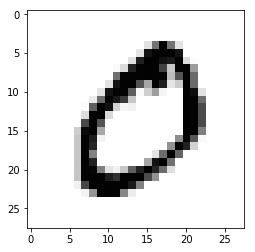

In [80]:

all_values = data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [81]:
scaled_input = (np.asfarray(all_values[1:])/255.0 * 0.99)+0.01
print(scaled_input)

[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.

In [92]:
inputNodes = 784
outputNodes = 10
hiddenNodes = 200


learningRate = 0.1

nN = NeuralNet(inputNodes, outputNodes, hiddenNodes, learningRate)

epochs = 5

for i in range(epochs):
    for record in data_list:
        all_vaules = record.split(',')
        inputs = (np.asfarray(all_values[1:])/255*0.99)+0.01
        targets = np.zeros(outputNodes)+0.01
        targets[int(all_values[0])] = 0.99
        nN.train(inputs,targets)

In [93]:
test_data_file = open('mnist_test_10.csv','r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [97]:
all_vals = test_data_list[0].split(',')
print(all_vals[0])

7


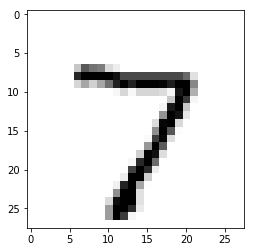

In [98]:
imageArray = np.asfarray(all_vals[1:]).reshape(28,28)
matplotlib.pyplot.imshow(imageArray, cmap="Greys",interpolation="None")

In [99]:
nN.query((np.asfarray(all_vals[1:])/255.0 * 0.99) +0.01)

final Inputs : 
[[-1.36214785]
 [ 3.27288933]
 [ 0.96813141]
 [-1.63563069]
 [-2.51966246]
 [-3.62769904]
 [-3.78545692]
 [-2.64775507]
 [-2.11622465]
 [-1.1031951 ]]


array([[ 0.20389144],
       [ 0.96348695],
       [ 0.72474689],
       [ 0.16306047],
       [ 0.07449121],
       [ 0.0258892 ],
       [ 0.0221947 ],
       [ 0.06612751],
       [ 0.10752984],
       [ 0.24914171]])